In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [7]:
import warnings

warnings.filterwarnings('ignore')

In [8]:
boston = load_boston()

In [10]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

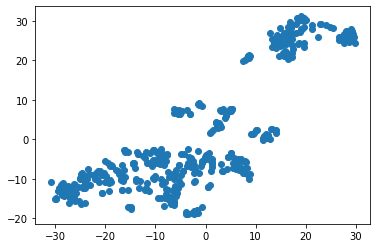

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

##### 2

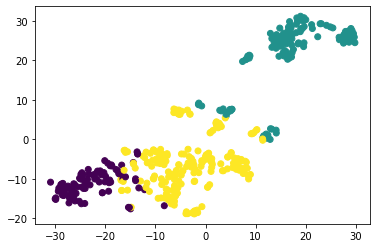

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [25]:
mean_price_1 = y_train[labels_train == 0].mean()
mean_price_2 = y_train[labels_train == 1].mean()
mean_price_3 = y_train[labels_train == 2].mean()
mean_price_1, mean_price_2, mean_price_3

(27.78837209302326, 16.165354330708663, 24.958115183246072)

In [26]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


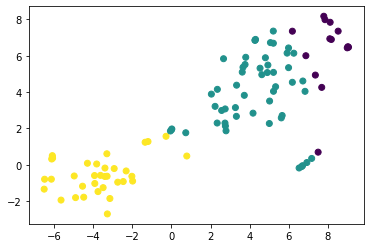

In [34]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [37]:
mean_price_1 = y_test[labels_test == 0].mean()
mean_price_2 = y_test[labels_test == 1].mean()
mean_price_3 = y_test[labels_test == 2].mean()
mean_price_1, mean_price_2, mean_price_3

IndexError: boolean index did not match indexed array along dimension 0; dimension is 102 but corresponding boolean dimension is 404

In [36]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
